In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

raw_data = pd.read_csv('../rodpump_noImputed.csv')


In [2]:
from sklearn.preprocessing import LabelEncoder

def encode(df, columns):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [3]:
categorical_columns = ['bha_configuration',
                      'wellbore_category',
                       'packer_vs_tac',
                       'rod_sinker_type',
                       'manual_scale',
                       'rod_make',
                       'rod_apigrade',
                       'DESANDDEGAS_TYP',
                       'rod_has_guides'
                      ]

In [4]:
#encode catagorical variables
for column in raw_data:
    if (column in categorical_columns):
        encode(raw_data, column)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [8]:
#remove pump identifiers
features = list(raw_data)
features.remove('FAILURETYPE')
features.remove('roduid')
features.remove('UWI')
features.remove('lifetime_end')
features.remove('pump_bore')

#define x and y dataset (train/ test data)
X = np.array(raw_data[features])
y = np.array(raw_data['FAILURETYPE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

#scaling/normalizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




In [8]:
# y_pred = classifier.predict(X_test)

In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

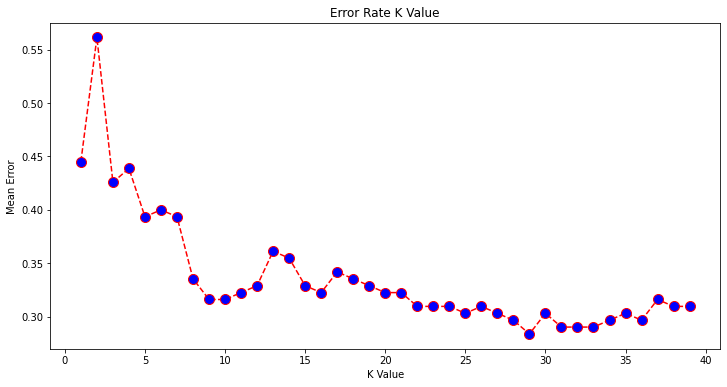

In [10]:
#plotting errors to see which k value produces lowest mean error
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [14]:
#KNN set up and run / finding best k value to use
# print("Accuracy = # of correct predictions over total predictions")
# print("Precision = # correctly positively identified classifiactions over total positive identifications (True positives  over True positives + False Positives)")
# print("Recall = # of actual postives identified correctly (True positives over true positives + false negatives), want this to generally be close to 1.00")
# print("F1-score = the harmonic mean of precision and recall, preciseness of model")
# print("Support = total number test cases")
# print()
# print()

best_k = 0
best_metric = 0
for i in range(1, 40):
    n_neighbors=i
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    print(confusion_matrix(y_test, pred_i))
    # print(classification_report(y_test, pred_i))
    print("The accuracy of the KNN model unsing a K value of " + str(n_neighbors) +" is: " + str(metrics.accuracy_score(y_test, pred_i)))
    if metrics.accuracy_score(y_test, pred_i) > best_metric:
        best_k = n_neighbors
        best_metric = metrics.accuracy_score(y_test, pred_i)

print("The best accuracy of the KNN model unsing a K value of " + str(best_k) +" is: " + str(best_metric))



[[ 2  3 13]
 [ 5 10 16]
 [14 18 74]]
The accuracy of the KNN model unsing a K value of 1 is: 0.5548387096774193
[[ 5  6  7]
 [ 9 13  9]
 [25 31 50]]
The accuracy of the KNN model unsing a K value of 2 is: 0.43870967741935485
[[ 4  2 12]
 [ 9  3 19]
 [16  8 82]]
The accuracy of the KNN model unsing a K value of 3 is: 0.5741935483870968
[[ 1  4 13]
 [ 4  7 20]
 [14 13 79]]
The accuracy of the KNN model unsing a K value of 4 is: 0.5612903225806452
[[ 2  4 12]
 [ 4  7 20]
 [10 11 85]]
The accuracy of the KNN model unsing a K value of 5 is: 0.6064516129032258
[[ 2  3 13]
 [ 4  6 21]
 [13  8 85]]
The accuracy of the KNN model unsing a K value of 6 is: 0.6
[[ 2  3 13]
 [ 2  6 23]
 [11  9 86]]
The accuracy of the KNN model unsing a K value of 7 is: 0.6064516129032258
[[ 2  3 13]
 [ 3  7 21]
 [ 8  4 94]]
The accuracy of the KNN model unsing a K value of 8 is: 0.6645161290322581
[[ 3  3 12]
 [ 4  6 21]
 [ 7  2 97]]
The accuracy of the KNN model unsing a K value of 9 is: 0.6838709677419355
[[ 2  

In [10]:
# Same as above but using the cross validation method

best_k = 0
best_metric = 0
for i in range(1, 40):
    n_neighbors=i
    knn = KNeighborsClassifier(n_neighbors)
    this_score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    if this_score.mean() > best_metric:
        best_k = n_neighbors
        best_metric = this_score.mean()
        
print("The best accuracy of the KNN model unsing a K value of " + str(best_k) +" is: " + str(best_metric))

The best accuracy of the KNN model unsing a K value of 37 is: 0.6085295349811479


In [12]:
raw_data.shape

(774, 45)